In [1]:
from src.loader import InstanceLoader
obj_folder = "/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/segmentation"

In [3]:
t = InstanceLoader(obj_folder=obj_folder, skeleton_toml_path="skeleton.toml", pose_csv="./tracking/28/240905-1616_session28_track99_points3d.csv", obj_ref_frame=2599, obj_transform_toml=f"{obj_folder}/240905-1616_seed_session28_first.toml")

In [2]:
from src.animal import AnimalList
track_folder = "/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking"
# A = AnimalList("skeleton.toml", track_folder, session_number=28)
t = InstanceLoader(obj_folder=obj_folder,
                        skeleton_toml_path="skeleton.toml",
                        track_folder=track_folder,
                        session_number=28,
                        obj_ref_frame=2599,
                        obj_transform_toml=f"{obj_folder}/240905-1616_seed_session28_first.toml")

PosixPath('/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking/240905-1616_session28_track12_points3d.csv') generated an exception: Pose csv does not contain any valid frames
PosixPath('/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking/240905-1616_session28_track13_points3d.csv') generated an exception: Pose csv does not contain any valid frames
PosixPath('/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking/240905-1616_session28_track10_points3d.csv') generated an exception: Pose csv does not contain any valid frames
PosixPath('/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking/240905-1616_session28_track0_points3d.csv') generated an exception: Pose csv does not contain any valid frames
PosixPath('/Users/persie/PhD_Code/3d_ant_data_rle/240905-1616/outputs/tracking/240905-1616_session28_track11_points3d.csv') generated an exception: Pose csv does not contain any valid frames
PosixPath('/Users/persie/PhD_Code/3d_ant_data_

In [5]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list)
ground_box = g.get_ground_collision()

In [3]:
from src.collision import CollisionDetector
c = CollisionDetector(animal_list=t.animal_list, obj_list=t.obj_list )

In [5]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list)
g.visualise_bounding_box()



In [8]:
from src.visual_widget import MultiViewer
V = MultiViewer(t.animal_list, t.obj_list, 0, collision=c, axis=g.tform, fps=30, hold_window=20)

ERROR:src.animal:No rays present for animal at frame 1561
ERROR:src.animal:No rays present for animal at frame 1562
ERROR:src.animal:No rays present for animal at frame 1563
ERROR:src.animal:No rays present for animal at frame 1564
ERROR:src.animal:No rays present for animal at frame 1565
ERROR:src.animal:No rays present for animal at frame 1566
ERROR:src.animal:No rays present for animal at frame 1567
ERROR:src.animal:No rays present for animal at frame 1568
ERROR:src.animal:No rays present for animal at frame 1569
ERROR:src.animal:No rays present for animal at frame 1570
ERROR:src.animal:No rays present for animal at frame 1571
ERROR:src.animal:No rays present for animal at frame 1572
ERROR:src.animal:No rays present for animal at frame 1573
ERROR:src.animal:No rays present for animal at frame 1574
ERROR:src.animal:No rays present for animal at frame 1575
ERROR:src.animal:No rays present for animal at frame 1576
ERROR:src.animal:No rays present for animal at frame 1577
ERROR:src.anim

AttributeError: 'NoneType' object has no attribute 'object_space'

Starting point is invalid: Node: a_L0, Frame: 260
Starting point is invalid: Node: a_R0, Frame: 260
Starting point is invalid: Node: a_L0, Frame: 261
Starting point is invalid: Node: a_R0, Frame: 261
End point is invalid: Node: neck, Frame: 262
Starting point is invalid: Node: a_L0, Frame: 262
Starting point is invalid: Node: a_R0, Frame: 262
Starting point is invalid: Node: neck, Frame: 262
Starting point is invalid: Node: a_L0, Frame: 263
Starting point is invalid: Node: a_R0, Frame: 263
Starting point is invalid: Node: a_L0, Frame: 264
Starting point is invalid: Node: a_R0, Frame: 264
Starting point is invalid: Node: a_L0, Frame: 265
Starting point is invalid: Node: a_R0, Frame: 265
End point is invalid: Node: neck, Frame: 266
Starting point is invalid: Node: a_L0, Frame: 266
Starting point is invalid: Node: a_R0, Frame: 266
Starting point is invalid: Node: neck, Frame: 266
Starting point is invalid: Node: a_L0, Frame: 267
Starting point is invalid: Node: a_R0, Frame: 267
End point 

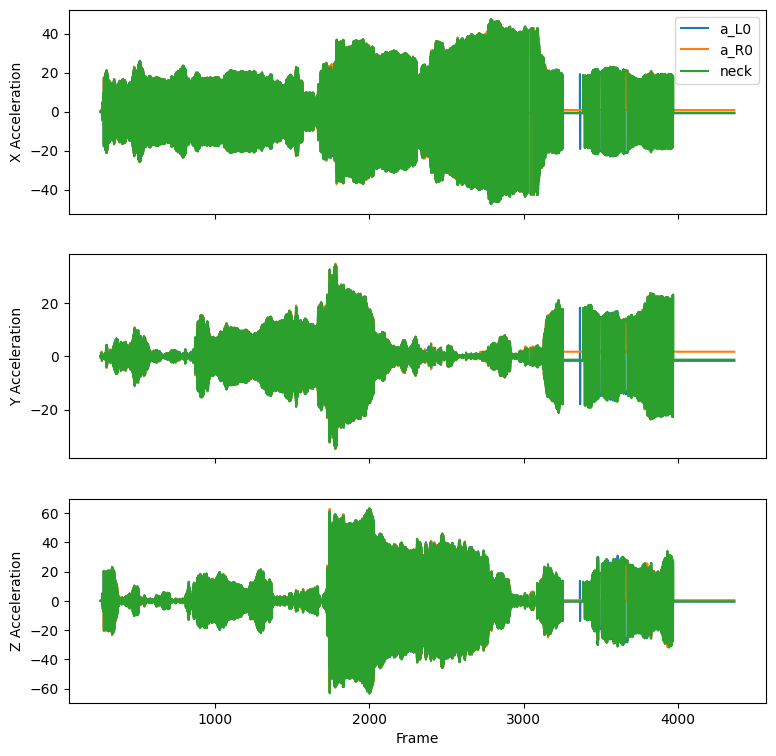

In [19]:
from scripts.tools.x_y_z_plot import KPPosition, KPVelocityXYZ, KPAccXYZ, KPDisplaceMag, KPVelocityMag, KPAccelerationMag


KP = KPAccXYZ(t.animal_list.animals[8], node=['a_L0', 'a_R0', 'neck'], window_size=1)